In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
from datetime import datetime, timedelta
import time
import math
from collections import Counter

In [68]:
file_name = "airports.csv"
airports = pd.read_csv(file_name)
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [69]:
file_name = "airlines.csv"
airlines = pd.read_csv(file_name)
airlines.head()

,AIRLINE,IATA_CODE,SPEED
0,United Air Lines Inc.,UA,735.177603
1,American Airlines Inc.,AA,720.553350
2,US Airways Inc.,US,684.948841
3,Frontier Airlines Inc.,F9,712.047887
4,JetBlue Airways,B6,706.310698


In [70]:
file_name = "flights.csv"
flights= pd.read_csv(file_name, dtype={ 'YEAR': int, 'MONTH': int, 'DAY': int, 'DAY_OF_WEEK': int,
                                             'AIRLINE': np.string_, 'FLIGHT_NUMBER': int, 'TAIL_NUMBER': np.string_, 
                                             'ORIGIN_AIRPORT': np.string_, 'DESTINATION_AIRPORT': np.string_, 
                                             'SCHEDULED_DEPARTURE': int, 'DEPARTURE_TIME': float,
                                             'DEPARTURE_DELAY': float, 'TAXI_OUT': float, 'WHEELS_OFF': float,
                                             'SCHEDULED_TIME': float, 'ELAPSED_TIME': float, 'AIR_TIME': float,
                                             'DISTANCE': int, 'WHEELS_ON': float, 'TAXI_IN': float, 'SCHEDULED_ARRIVAL': int,
                                             'ARRIVAL_TIME': float, 'ARRIVAL_DELAY': float, 'DIVERTED': int, 'CANCELLED': int,
                                             'CANCELLATION_REASON': np.string_, 'AIR_SYSTEM_DELAY': float, 'SECURITY_DELAY': float, 
                                             'AIRLINE_DELAY': float,'LATE_AIRCRAFT_DELAY': float,'WEATHER_DELAY': float,},
                          usecols=[1,4,7,8,11,24])
flights.head()

,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,CANCELLED
0,1,AS,ANC,SEA,-11.0,0
1,1,AA,LAX,PBI,-8.0,0
2,1,US,SFO,CLT,-2.0,0
3,1,AA,LAX,MIA,-5.0,0
4,1,AS,SEA,ANC,-1.0,0


In [71]:
airport_mean_delays = pd.DataFrame(pd.Series(flights['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()

# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#___________________________________________________________

for carrier in abbr_companies.keys():
    fg1 = flights[flights['AIRLINE'] == carrier]
    test = fg1['DEPARTURE_DELAY'].groupby(flights['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

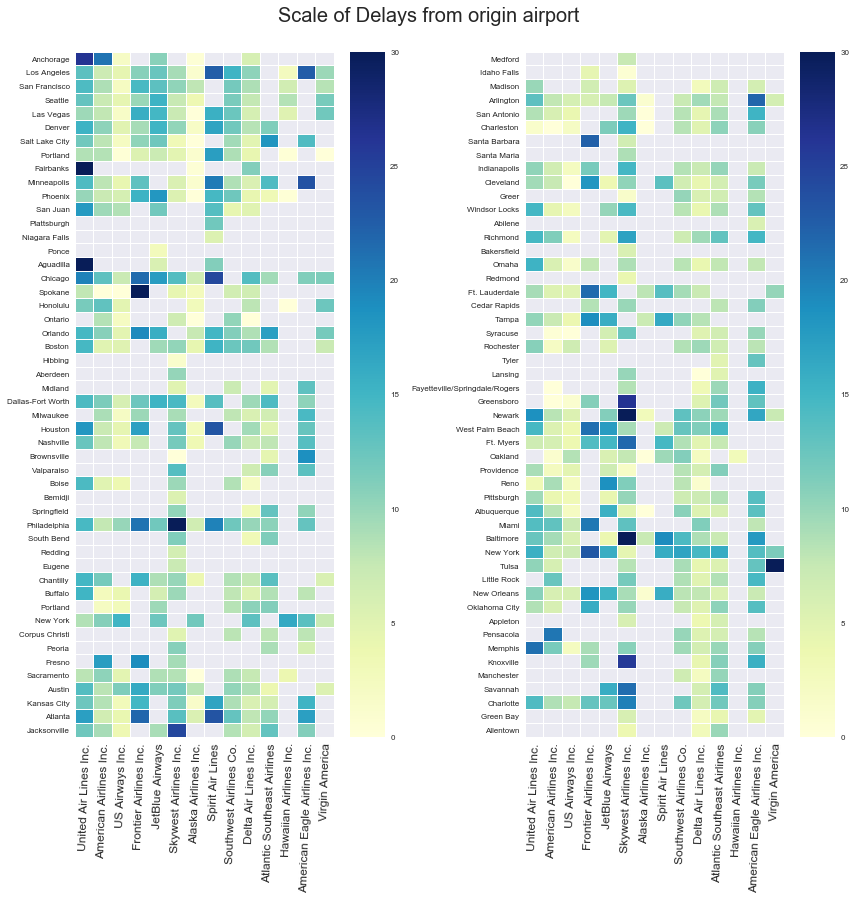

In [72]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(12,12))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Scale of Delays from origin airport", ha='center', fontsize = 20)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

In [73]:
subset.shape

(50, 14)

In [74]:
subset.head()

,United Air Lines Inc.,American Airlines Inc.,US Airways Inc.,Frontier Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Alaska Airlines Inc.,Spirit Air Lines,Southwest Airlines Co.,Delta Air Lines Inc.,Atlantic Southeast Airlines,Hawaiian Airlines Inc.,American Eagle Airlines Inc.,Virgin America
0,,,,,,,,,,,,,,
Medford,NaN,NaN,NaN,NaN,NaN,7.496515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Idaho Falls,NaN,NaN,NaN,4.500000,NaN,0.678636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madison,9.925049,NaN,NaN,6.514151,NaN,5.387553,NaN,NaN,NaN,2.742665,6.833589,NaN,6.429778,NaN
Arlington,13.305077,7.793527,6.149469,6.052792,7.516722,12.524199,1.027190,NaN,7.341569,9.386340,7.661065,NaN,22.021538,6.361842
San Antonio,8.556886,5.865610,4.100917,NaN,NaN,9.711208,-0.831832,NaN,8.362696,4.560910,8.918054,NaN,15.154639,NaN


In [75]:
subset.index.name = "city"
where_are_NaNs = np.isnan(subset)
subset[where_are_NaNs] = 0

In [76]:
subset.head()

,United Air Lines Inc.,American Airlines Inc.,US Airways Inc.,Frontier Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Alaska Airlines Inc.,Spirit Air Lines,Southwest Airlines Co.,Delta Air Lines Inc.,Atlantic Southeast Airlines,Hawaiian Airlines Inc.,American Eagle Airlines Inc.,Virgin America
city,,,,,,,,,,,,,,
Medford,0.000000,0.000000,0.000000,0.000000,0.000000,7.496515,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Idaho Falls,0.000000,0.000000,0.000000,4.500000,0.000000,0.678636,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Madison,9.925049,0.000000,0.000000,6.514151,0.000000,5.387553,0.000000,0.0,0.000000,2.742665,6.833589,0.0,6.429778,0.000000
Arlington,13.305077,7.793527,6.149469,6.052792,7.516722,12.524199,1.027190,0.0,7.341569,9.386340,7.661065,0.0,22.021538,6.361842
San Antonio,8.556886,5.865610,4.100917,0.000000,0.000000,9.711208,-0.831832,0.0,8.362696,4.560910,8.918054,0.0,15.154639,0.000000


In [77]:
cities = []
airlines = []
delays = []
for pos, row in subset.iterrows():
    for i in range(len(row)):
        #print(row.name,row.index[i],row[i])
        cities.append(row.name)
        airlines.append(row.index[i])
        delays.append(row[i])

In [78]:
d = {'city': cities, 'airline': airlines, 'delay': delays}
df = pd.DataFrame(data=d)
df.to_csv("heat_delays.csv", encoding='utf-8', index=False)

,United Air Lines Inc.,American Airlines Inc.,US Airways Inc.,Frontier Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Alaska Airlines Inc.,Spirit Air Lines,Southwest Airlines Co.,Delta Air Lines Inc.,Atlantic Southeast Airlines,Hawaiian Airlines Inc.,American Eagle Airlines Inc.,Virgin America
city,,,,,,,,,,,,,,
Medford,True,True,True,True,True,False,True,True,True,True,True,True,True,True
Idaho Falls,True,True,True,False,True,False,True,True,True,True,True,True,True,True
Madison,False,True,True,False,True,False,True,True,True,False,False,True,False,True
Arlington,False,False,False,False,False,False,False,True,False,False,False,True,False,False
San Antonio,False,False,False,True,True,False,False,True,False,False,False,True,False,True
Charleston,False,False,False,True,False,False,False,True,False,False,False,True,False,True
Santa Barbara,True,True,True,False,True,False,True,True,True,True,True,True,True,True
Santa Maria,True,True,True,True,True,False,True,True,True,True,True,True,True,True
Indianapolis,False,False,False,False,True,False,True,True,False,False,False,True,False,True
